## Comprehensive Analysis of Automobile Sales Data

#### Introduction:
The goal of this project is to perform a comprehensive analysis of the given auto sales dataset. The dataset includes various attributes related to orders, products, customers, and sales. By exploring and analyzing this data, we aim to uncover insights that can inform business decisions, identify trends, and improve sales strategies.

#### Objectives:
To load and understand the structure of the dataset.
To clean and preprocess the data for accurate analysis.
To perform exploratory data analysis (EDA) to uncover patterns and relationships in the data.
To summarize the findings and provide actionable insights.

## Data Cleaning and Preprocessing

In [5]:
#Import the Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
#Loading the file
df = pd.read_csv('automobile.csv', parse_dates=['ORDERDATE'], dayfirst=True)

In [7]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


In [8]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

-There are all non-null values, indicating no missing values in the dataset.
-The dataset contains 2747 entries with 20 columns.
-The data types are consistent with the expected values. Numerical columns such as ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, DAYS_SINCE_LASTORDER, and MSRP are appropriately typed as integers or floats.
Categorical data such as ORDERDATE, STATUS, PRODUCTLINE, and customer information are correctly identified as objects.

Create dataframes for the numerical and categorical data for further use.

In [9]:
df_numerical = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_numerical.columns, len(list(df_numerical.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object') 6


Numerical features
Since ORDERNUMBER is not relevant for the EDA here, we will drop for exploratory data analysis & visualizations.

In [10]:
df_categorical = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_categorical.columns, len(list(df_categorical.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


Categorical Features
-We do not need below columns for analysis hence we will exlude from plots: 'PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'

## Exploratory Data Analysis (EDA)

#### Descriptive Statistics

In [11]:
# Display summary statistics for numerical variables
display(round(df_numerical.describe(), 2).T)

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2747.0,35.10,9.76,6.00,27.00,35.00,43.00,97.00
PRICEEACH,2747.0,101.10,42.04,26.88,68.74,95.55,127.10,252.87
ORDERLINENUMBER,2747.0,6.49,4.23,1.00,3.00,6.00,9.00,18.00
SALES,2747.0,3553.05,1838.95,482.13,2204.35,3184.80,4503.09,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.09,819.28,42.00,1077.00,1761.00,2436.50,3562.00
MSRP,2747.0,100.69,40.11,33.00,68.00,99.00,124.00,214.00


In [12]:
# Display summary statistics for categorical variables
df.describe(include=['object']).T

,count,unique,top,freq
STATUS,2747,6,Shipped,2541
PRODUCTLINE,2747,7,Classic Cars,949
PRODUCTCODE,2747,109,S18_3232,51
CUSTOMERNAME,2747,89,Euro Shopping Channel,259
PHONE,2747,88,(91) 555 94 44,259
ADDRESSLINE1,2747,89,"C/ Moralzarzal, 86",259
CITY,2747,71,Madrid,304
POSTALCODE,2747,73,28034,259
COUNTRY,2747,19,USA,928
CONTACTLASTNAME,2747,76,Freyre,259


Order Findings:
- Average order line number is 6.5, with a maximum of 18, indicating that some orders contain multiple items, potentially reflecting bulk purchases.
Sales and Pricing:
- Prices range from $26.88 to $252.87.
- Sales values vary significantly, averaging around $3553.05.
Order Timing:
- Days since last order range from 42 to 3562, showing varied customer order frequencies.
Geographical Distribution:
- USA is the most frequent country, with 928 entries.
- Madrid is the most common city, with 304 entries.
Product Line:
- "Classic Cars" is the most common product line.
- Seven unique product lines indicate a diverse catalog.
Order Status:
- Majority of orders are marked as "Shipped" (2541 out of 2747).
Deal Size:
- Medium deals are the most common, followed by small and large deals.
Top Customers and Products:
- "Euro Shopping Channel" is the most frequent customer.

#### Data Distribution

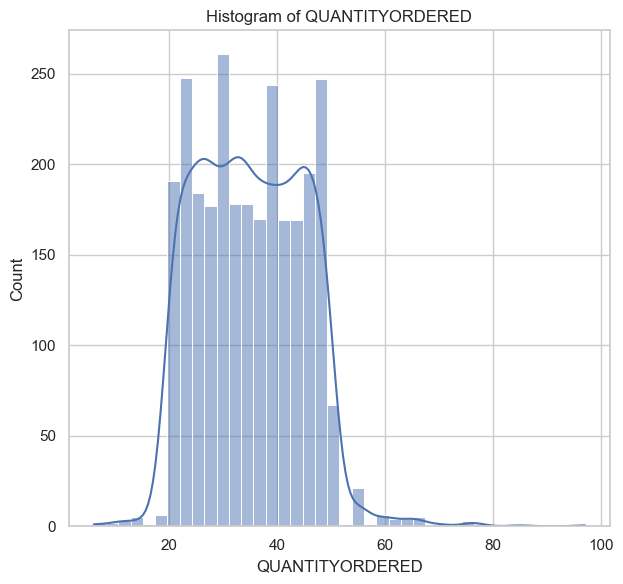

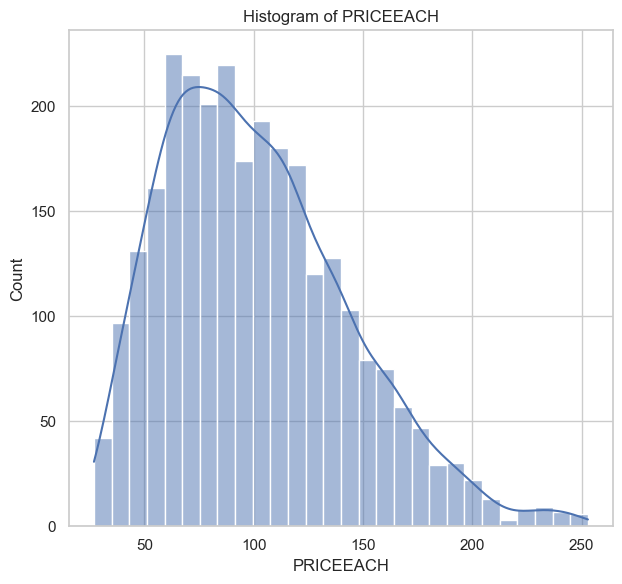

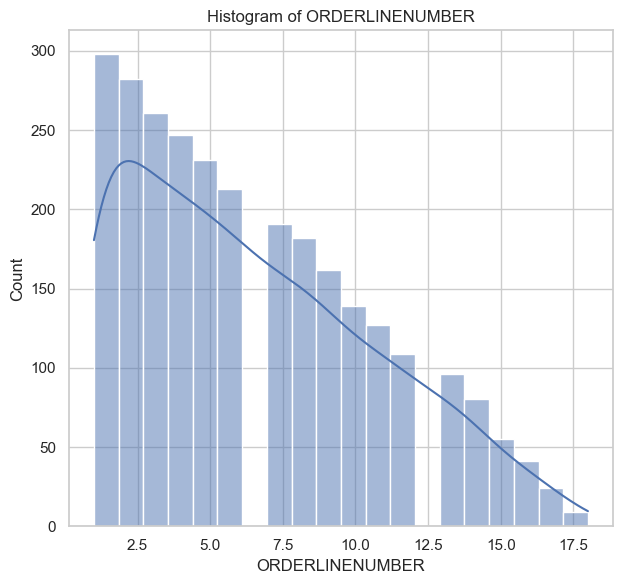

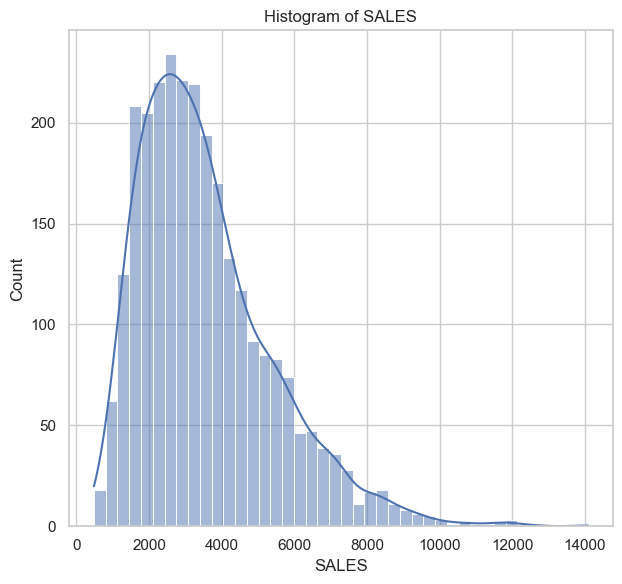

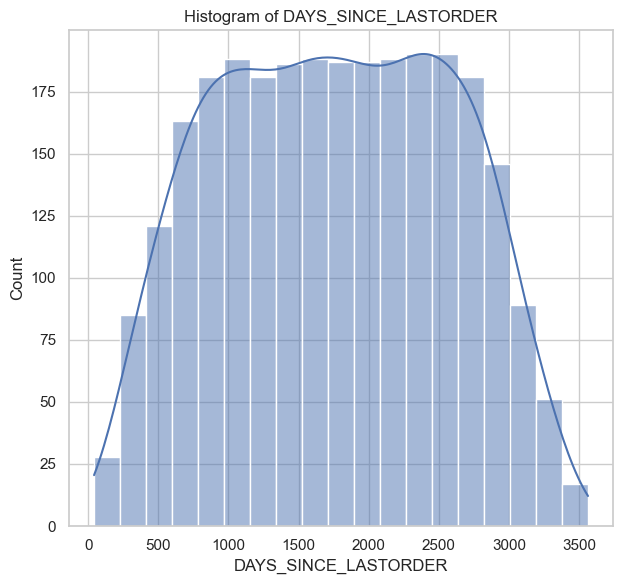

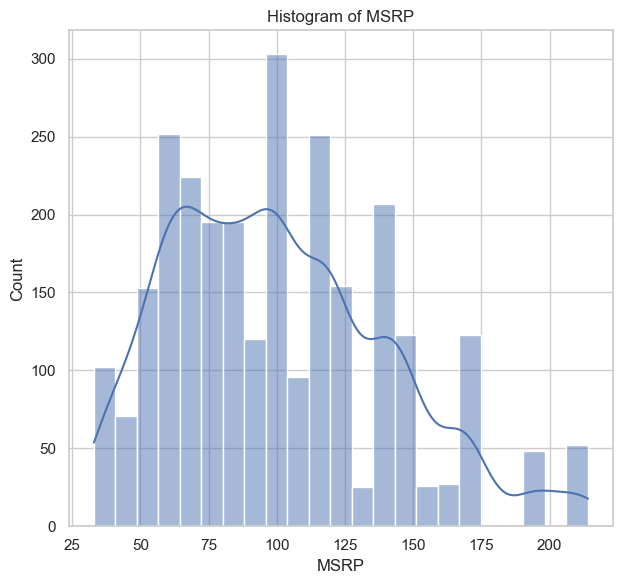

In [13]:
# Histograms and density plots for numerical features
for feature in df_numerical:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')

    plt.tight_layout()
    plt.show()

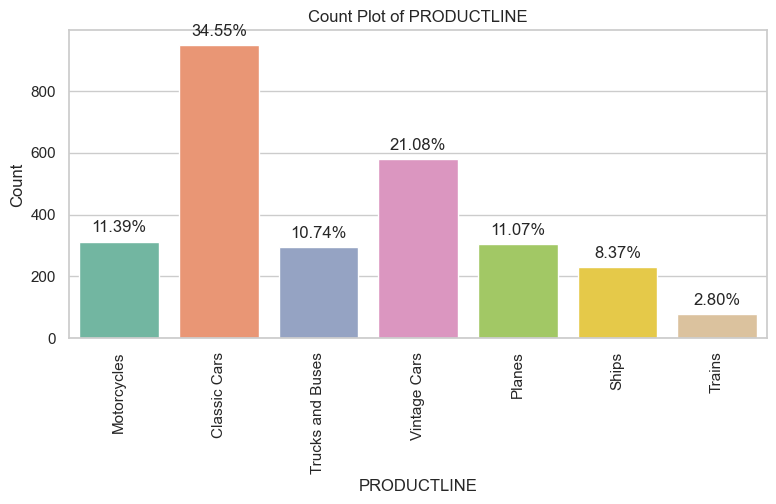

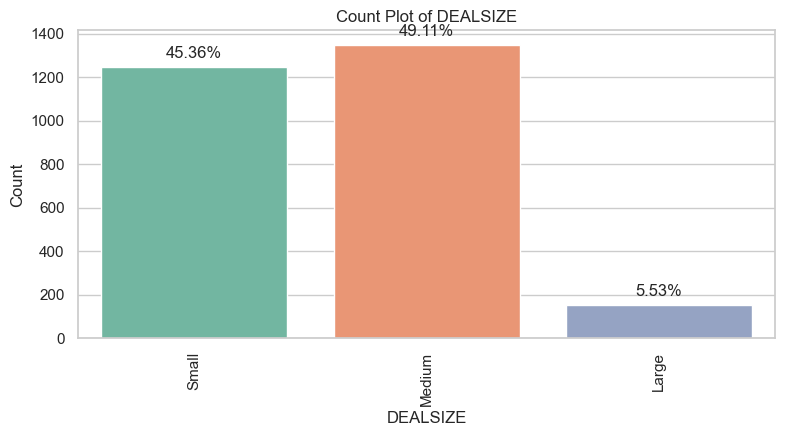

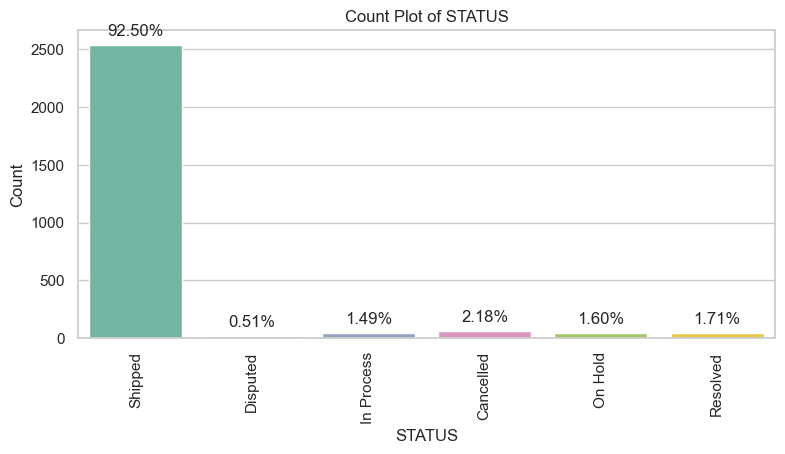

In [14]:
df_cat = ['PRODUCTLINE', 'DEALSIZE', 'STATUS']

# Create count plots for categorical features with percentage annotations
for feature in df_cat:
    plt.figure(figsize=(9, 4))
    ax = sns.countplot(data=df, x=feature, palette='Set2')
    
    # Calculate percentages and add annotations
    total = len(df[feature])
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., count), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f'Count Plot of {feature}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

Few Findings:
- Certain product lines, like "Classic Cars" and "Vintage Cars," dominate the dataset, suggesting higher popularity or sales volumes.
Deal Size Insights:
- Mid-sized deals are the most common, indicating that "Medium" deal sizes are a significant portion of the transactions.
Order Status Insights:
- The majority of orders are successfully "Shipped," reflecting a high efficiency in order fulfillment.

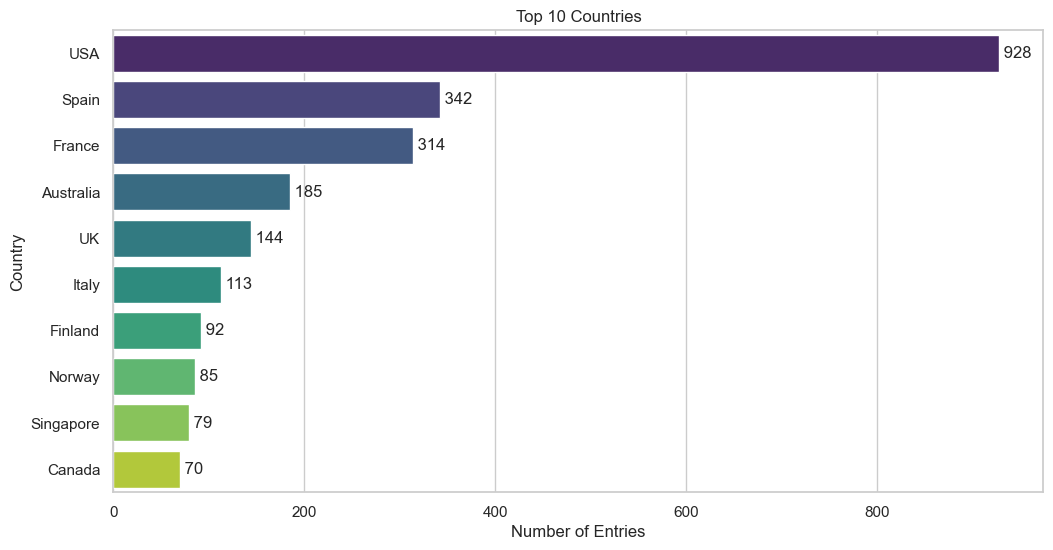

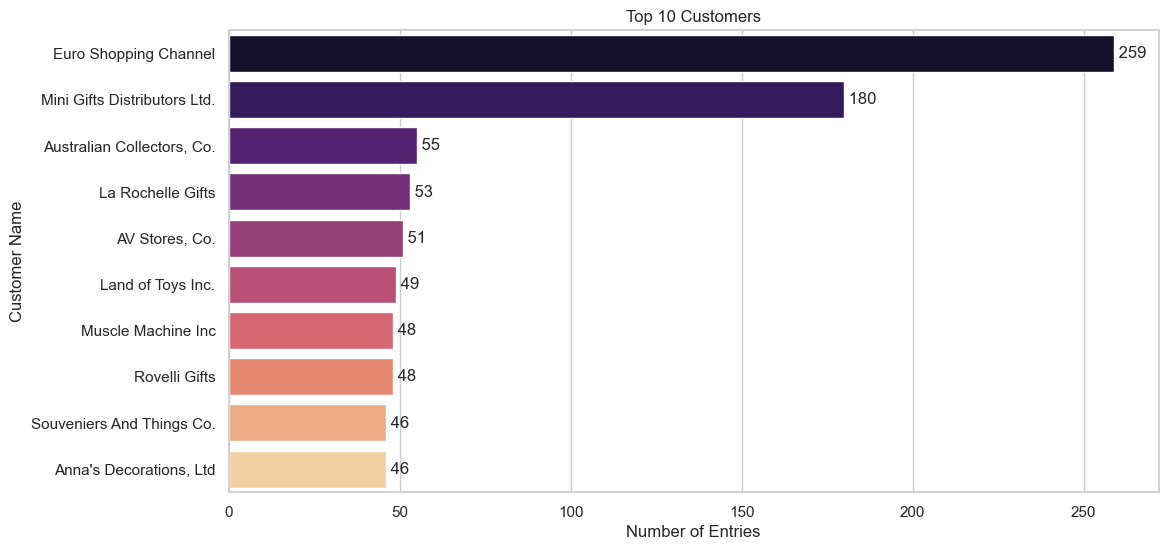

In [15]:
# Define a function to create bar plots for top 10 entries with marks
def plot_top_10(data, column, title, xlabel, ylabel, palette):
    plt.figure(figsize=(12, 6))
    top_10 = data[column].value_counts().head(10)
    ax = sns.barplot(x=top_10.values, y=top_10.index, palette=palette)
    
    # Add marks at the end of each bar
    for i in range(len(top_10)):
        ax.text(top_10.values[i], i, f' {top_10.values[i]}', va='center')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot for top 10 countries
plot_top_10(df, 'COUNTRY', 'Top 10 Countries', 'Number of Entries', 'Country', 'viridis')

# Plot for top 10 customers
plot_top_10(df, 'CUSTOMERNAME', 'Top 10 Customers', 'Number of Entries', 'Customer Name', 'magma')

Country Insights:
- The USA, Spain, France, and other leading countries are critical markets with high entry counts.
- Marketing and sales strategies should focus on these regions to leverage their strong market presence.

Customer Insights:
- Key customers such as "Euro Shopping Channel" and "Mini Gifts Distributors" are significant contributors to sales.
- Maintaining and enhancing relationships with top customers is essential for sustained business growth.

#### Correlation Analysis

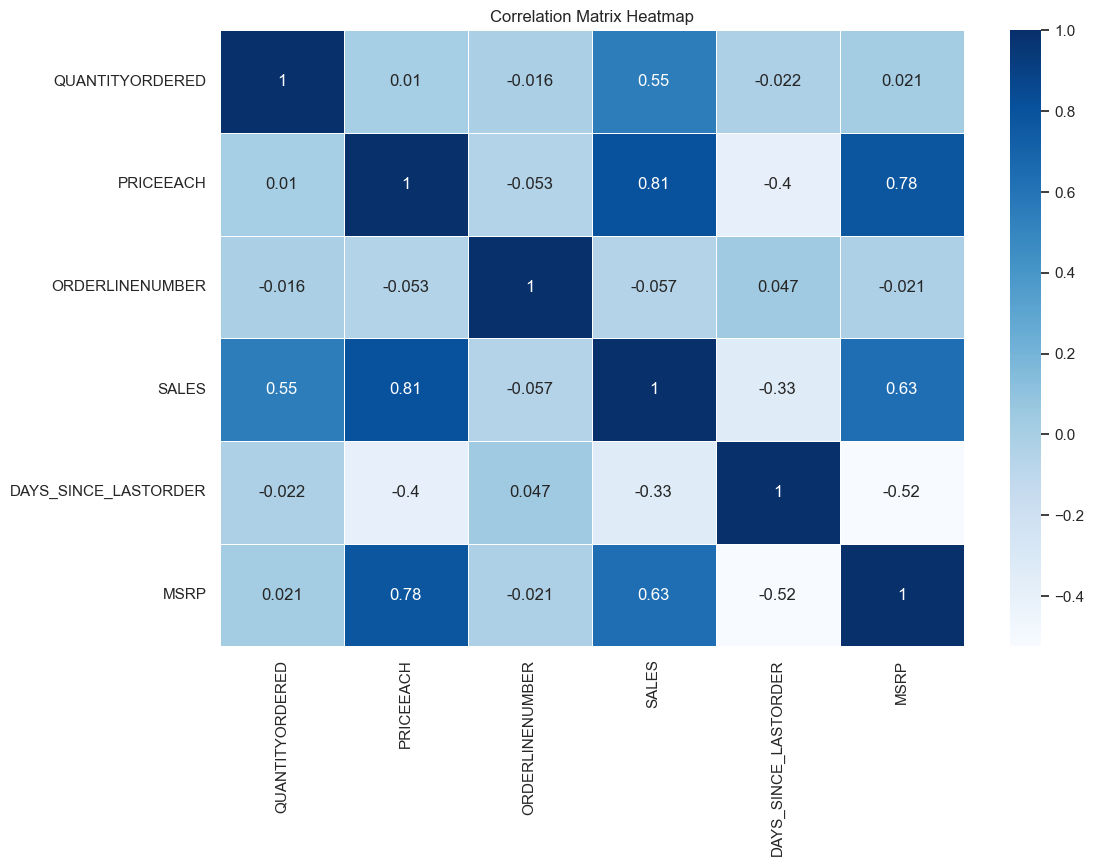

In [16]:
# Correlation matrix for numerical variables
corr = df_numerical.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.show()

###### Correlation Analysis
Strong Positive Correlations:
- SALES and QUANTITYORDERED have a high positive correlation. This indicates that as the quantity ordered increases, the sales amount also increases significantly.
- PRICEEACH and SALES also show a strong positive correlation, suggesting that higher-priced items tend to result in higher sales amounts.
- QUANTITYORDERED and PRICEEACH have a moderate positive correlation, indicating that higher quantities are often ordered for higher-priced items.
Moderate to Strong Correlations:
- MSRP and PRICEEACH have a strong correlation, reflecting that the manufacturer’s suggested retail price is closely related to the price at which each item is sold.
- ORDERLINENUMBER and QUANTITYORDERED show a moderate correlation, implying that orders with more line items tend to have higher quantities ordered.

#### Data Relationship

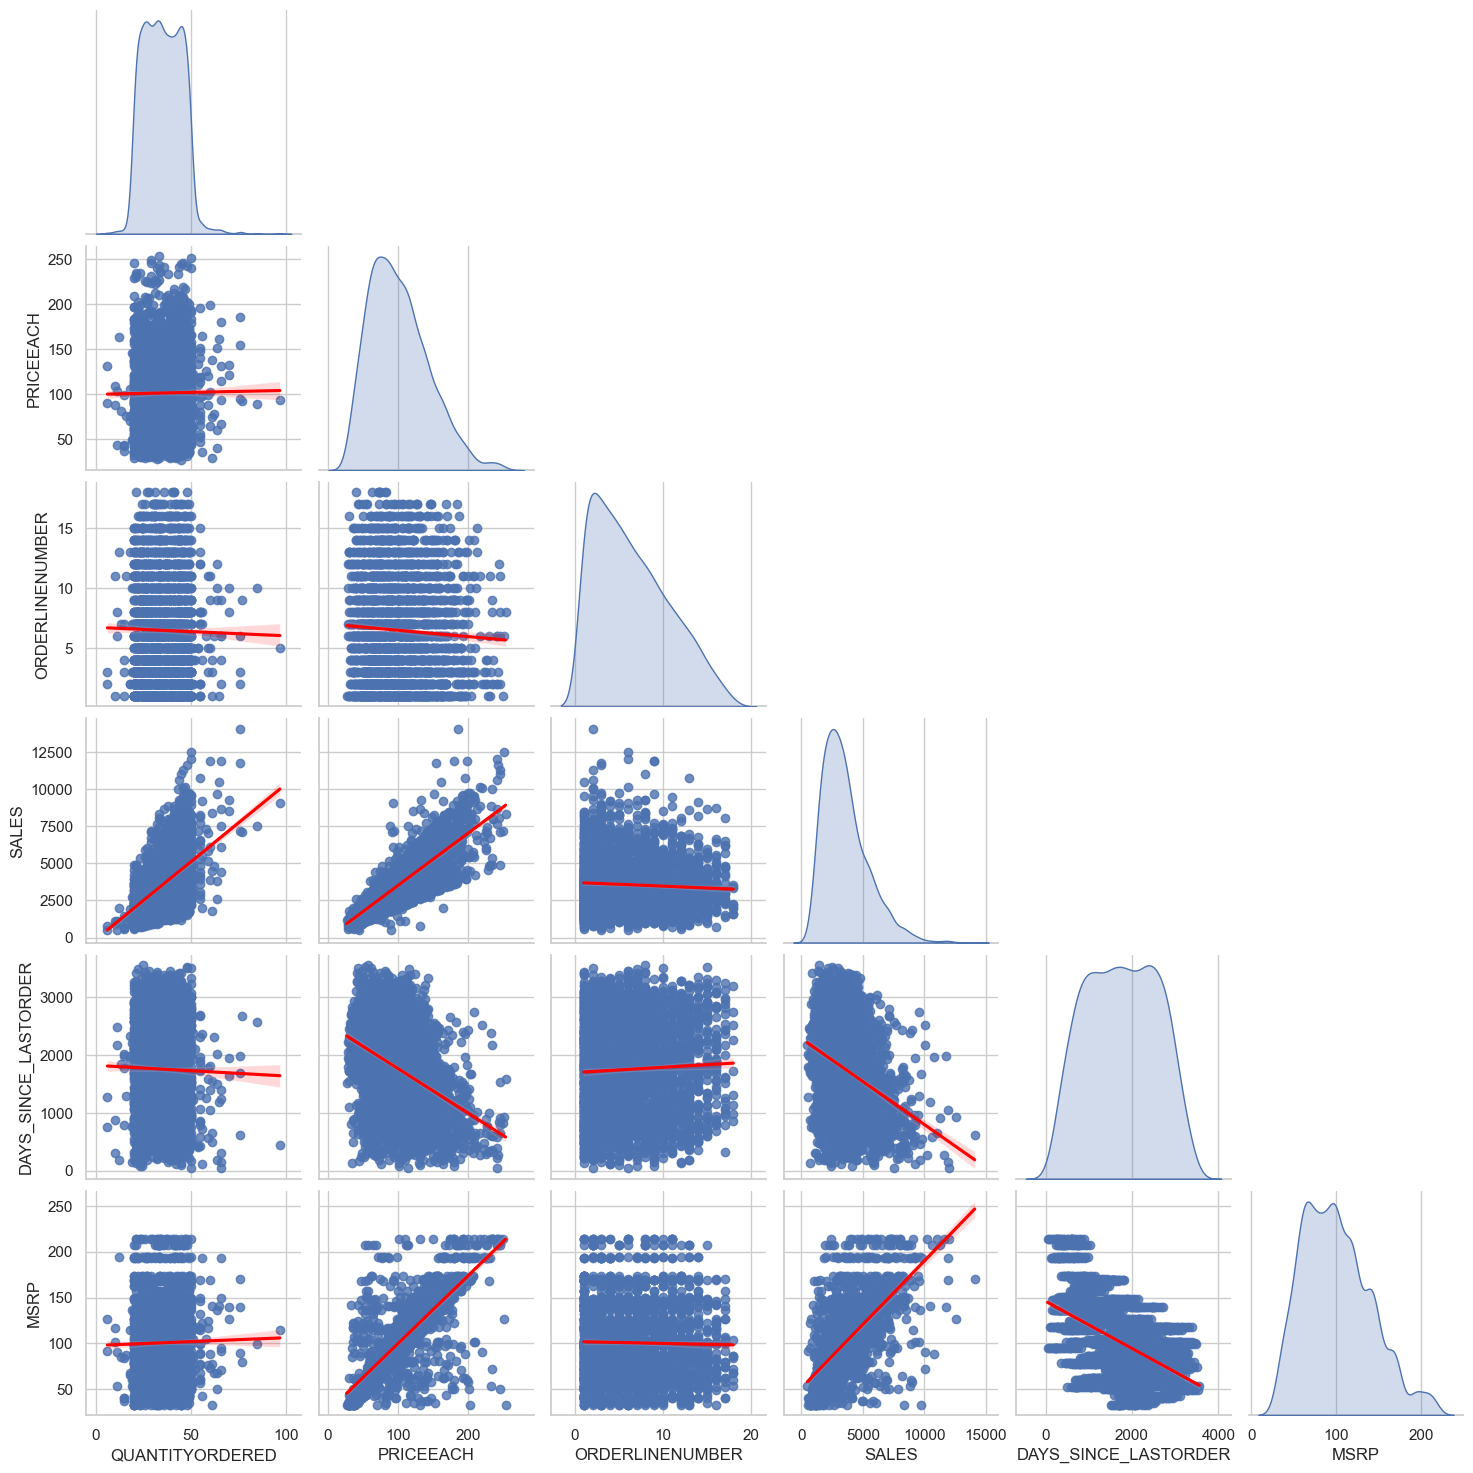

In [17]:
# Pairplot to examine relationships between numerical variables
sns.pairplot(data=df_numerical,kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}}, corner=True)
plt.show()

Pairplot Analysis:
- The scatter plot between SALES and QUANTITYORDERED shows a clear positive linear relationship, reinforcing the correlation matrix findings.
- The relationship between PRICEEACH and SALES is also linear and positive, indicating that higher unit prices contribute significantly to total sales.
- The regression lines in the scatter plots confirm the positive trends between the pairs of correlated features. The slopes of these lines further quantify the strength of these relationships.

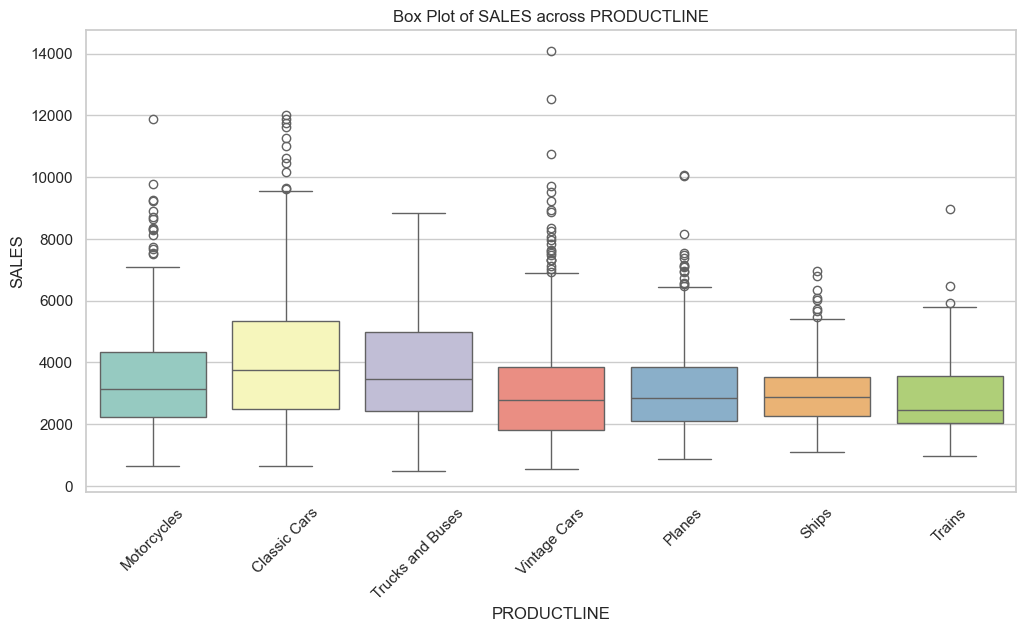

In [18]:
# Box plot for SALES across PRODUCTLINE
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df, palette='Set3')
plt.title('Box Plot of SALES across PRODUCTLINE')
plt.xlabel('PRODUCTLINE')
plt.ylabel('SALES')
plt.xticks(rotation=45)
plt.show()

The box plots highlight the variability in sales across different product lines:
- Classic Cars and Vintage Cars tend to have the highest and most variable sales.
- Motorcycles also perform well but with less variability.
- Trucks and Buses, Planes, Trains, and Ships generally have lower and more consistent sales values.

#### Time Series Analysis


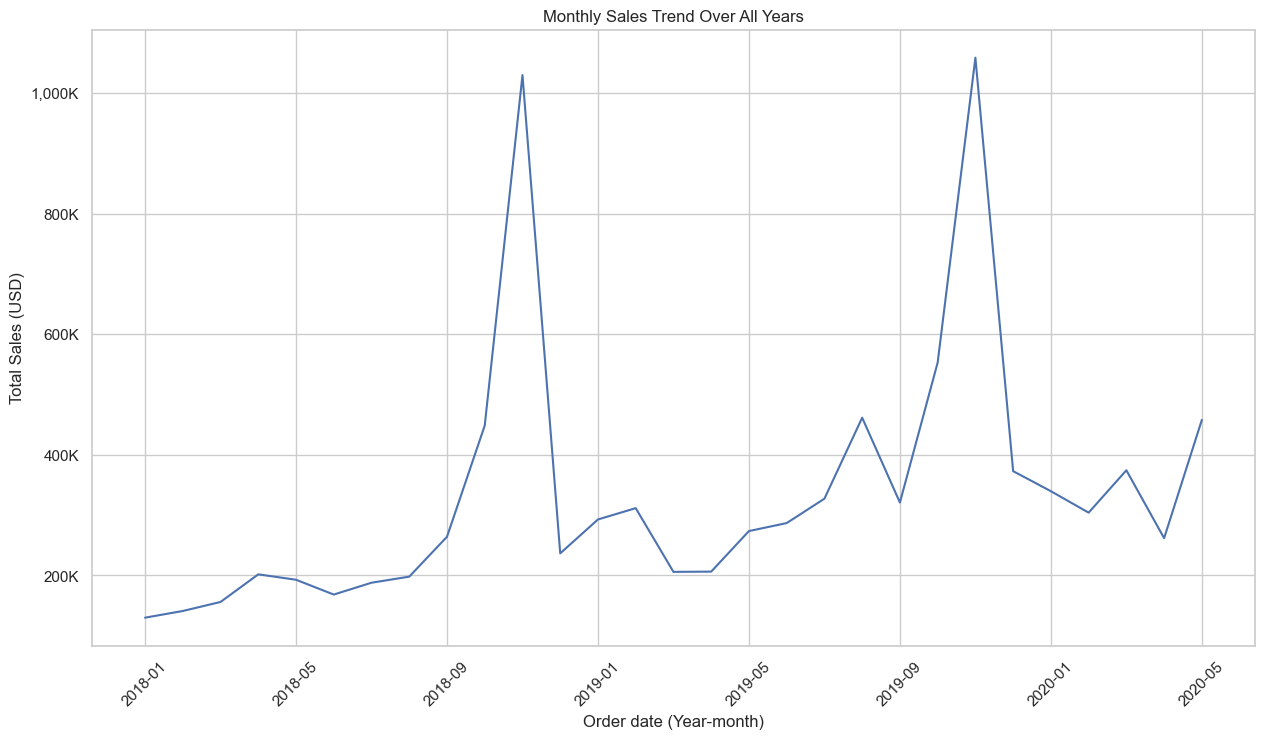

In [19]:
# Extract year and month from ORDERDATE and convert to string
df['YearMonth'] = df['ORDERDATE'].dt.to_period('M').astype(str)

# Group by YearMonth and sum sales
monthly_sales = df.groupby('YearMonth')['SALES'].sum().reset_index()

# Plot the monthly sales trend using seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(x='YearMonth', y='SALES', data=monthly_sales)
plt.title('Monthly Sales Trend Over All Years')
plt.xlabel('Order date (Year-month)')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Format y-axis ticker to display values in thousands (k)
formatter = FuncFormatter(lambda x, _: '{:,.0f}K'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

# Set ticker for every 4 months on x-axis
plt.gca().xaxis.set_major_locator(MultipleLocator(4))

plt.show()

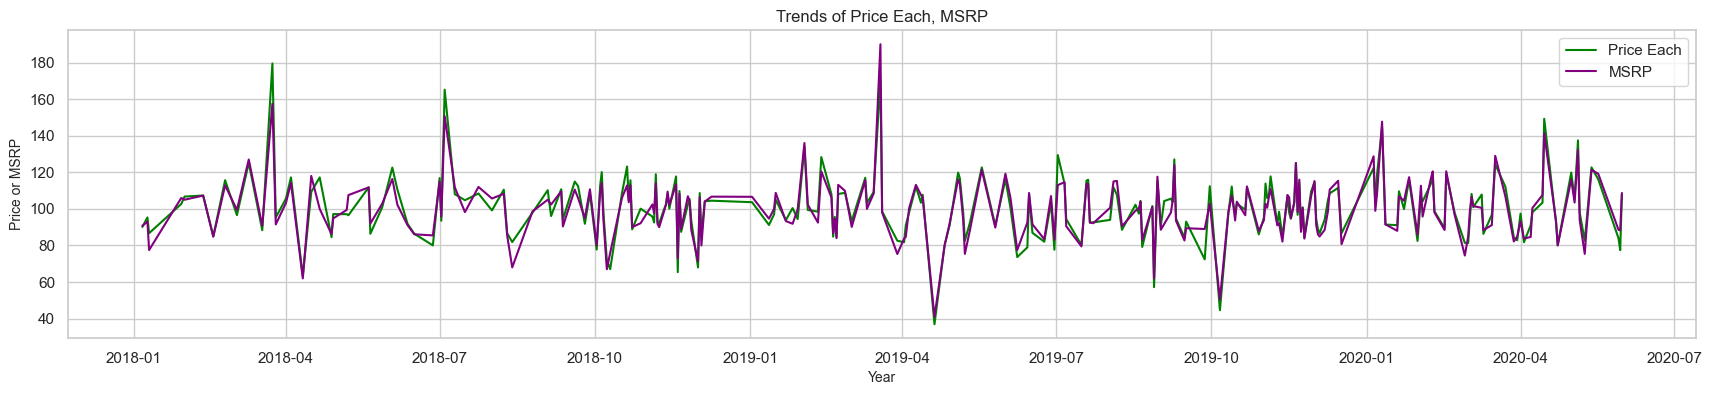

In [20]:
#Trend of Price and MSRP
sns.set(style="whitegrid", rc={"figure.figsize": (21, 4)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='green')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='purple')

plt.title("Trends of Price Each, MSRP")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Price or MSRP", fontsize=10)
plt.legend(loc='best')
plt.show()

- Reflects actual selling prices and their fluctuations over the order dates. Which is overtime its quite similar with the MSRP and above MSRP most of the time.
- Shows the manufacturer's suggested retail prices over time.
- Useful for comparing recommended pricing against actual selling prices to assess pricing effectiveness.

#### Geographical Analysis

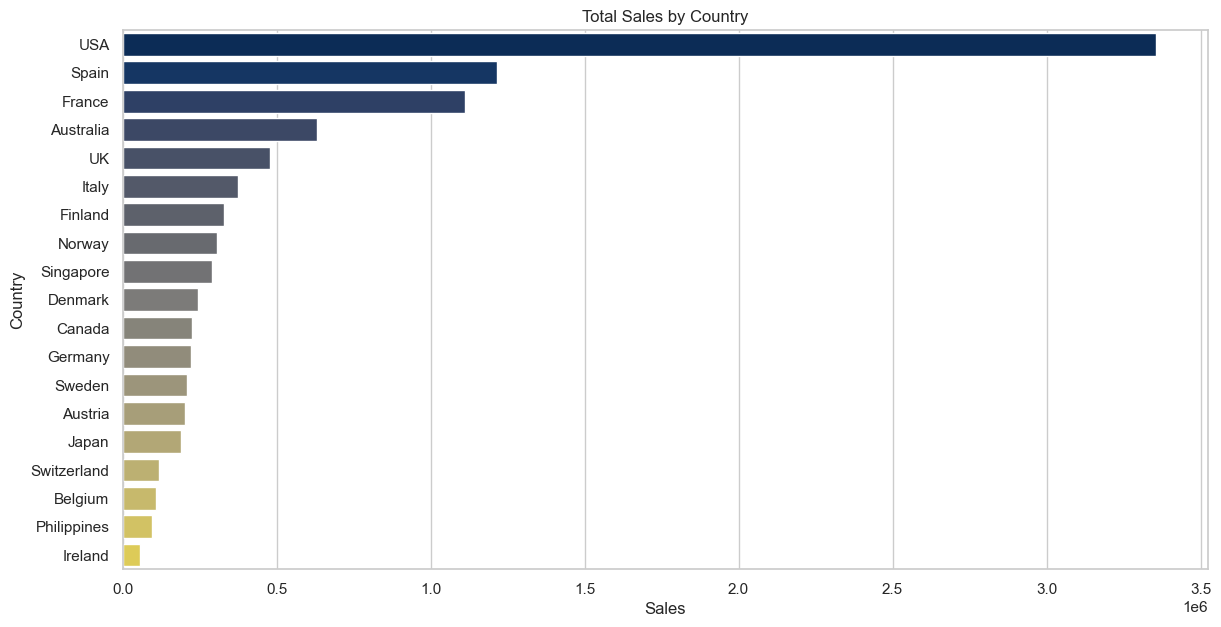

In [21]:
# Aggregate sales by country
sales_by_country = df.groupby('COUNTRY')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False)

# Plot the sales by country
plt.figure(figsize=(14, 7))
sns.barplot(x='SALES', y='COUNTRY', data=sales_by_country, palette='cividis')
plt.title('Total Sales by Country')
plt.xlabel('Sales')
plt.ylabel('Country')
plt.show()

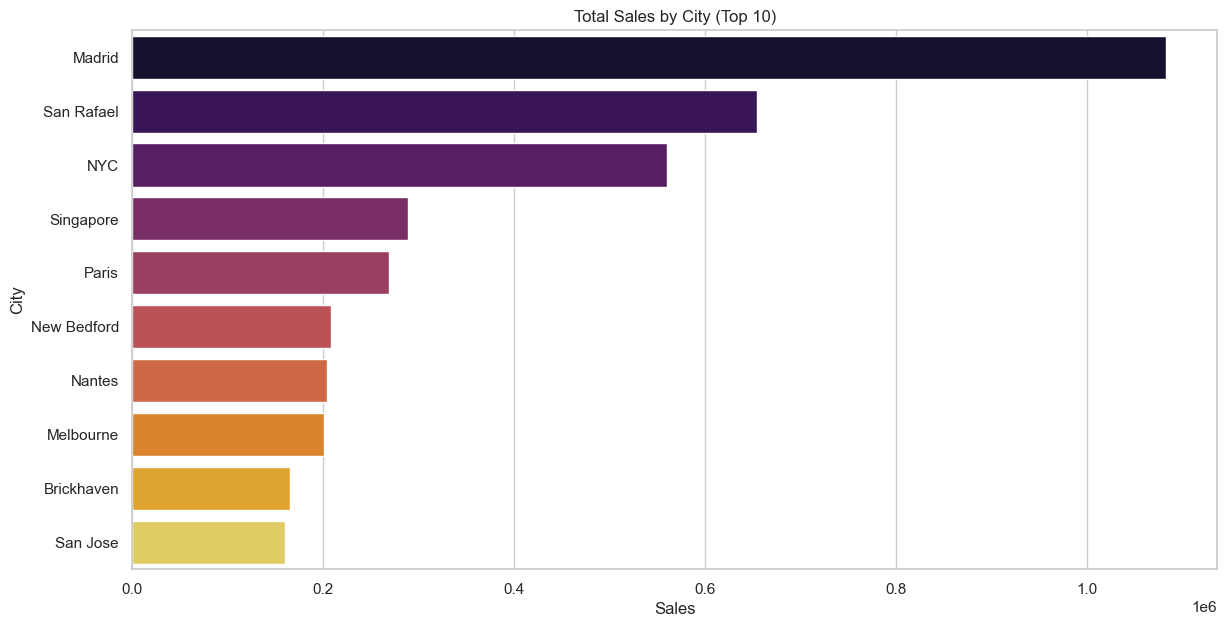

In [22]:
# Aggregate sales by city
sales_by_city = df.groupby('CITY')['SALES'].sum().reset_index().sort_values(by='SALES', ascending=False).head(10)

# Plot the sales by city (Top 20 cities)
plt.figure(figsize=(14, 7))
sns.barplot(x='SALES', y='CITY', data=sales_by_city, palette='inferno')
plt.title('Total Sales by City (Top 10)')
plt.xlabel('Sales')
plt.ylabel('City')
plt.show()

- The USA leading with huge gap and followed by Spain, France, Australia, and UK that are the top-performing countries in terms of sales.
- Major cities such as Madrid, San Rafael, New York, Singapore, Paris, and so on are significant contributors to the total sales.
- Sales are highly concentrated in a few key countries and major metropolitan areas, indicating the importance of these regions for business operations and strategic planning.

#### Summary and Conclusions:
- The most critical vital customers generating the most value are Euro Shopping Channel and Mini Gifts Distribution Ltd. as they are both involved in purchasing by large volume with a high frequency.

- Over the 2.5 years, we have sold 298 orders from 89 customers from 19 countries.
- The highest sales of our products are from the United States, Spain, and France as the following second choices. 
- For the second option, there is also a pretty significant sale from Australia and Singapore in the Eastern Hemisphere. 
- The highest sales in cities are from Madrid; the other high cities are San Diego and New York City. In the Eastern Hemisphere, the sales from Australia and Singapore declined while Japan added one customer to the customer list in 2019. 

- Most deals are of medium and small size; most purchases include 20 to 50 items.
- Company manufactures 109 automobile parts having 7 product lines. 
- The range price of the product is 26 to 252. 
- It is found that classic Car parts were most sold product line and contributed 40% of total revenue from sales. 

- The overall sales are increasing with month-to-month seasonality; yearly, it is highest in October and November. 
- During early 2020, the month-to-month period suggests higher sales and activity among the consumers compared to that of the past years.